# Convolutional AE con Keras

https://blog.keras.io/building-autoencoders-in-keras.html

In [2]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

In [34]:
# MODELO

# ENCODER
input_img = Input(shape=(28, 28, 1))
encoded = Conv2D(16, (2, 2), padding='same', strides=2,use_bias = False)(input_img)

# DECODER
decoded = Conv2DTranspose(1, (2, 2), strides = 2, padding='same',use_bias = False)(encoded)


In [35]:
opt = Adam(learning_rate=0.0001)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=opt, loss='mse')

In [36]:
# DATOS
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [37]:
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 16)        64        
                                                                 
 conv2d_transpose_6 (Conv2D  (None, 28, 28, 1)         64        
 Transpose)                                                      
                                                                 
Total params: 128 (512.00 Byte)
Trainable params: 128 (512.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
# ENTRENAMIENTO
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 6.0453e-04 - val_loss: 4.7080e-04
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 3.6217e-04 - val_loss: 2.4856e-04
Epoch 3/100
469/469 [==============================] - 1s 3ms/step - loss: 1.6835e-04 - val_loss: 9.6008e-05
Epoch 4/100
469/469 [==============================] - 1s 3ms/step - loss: 5.5520e-05 - val_loss: 2.4603e-05
Epoch 5/100
469/469 [==============================] - 1s 3ms/step - loss: 1.1876e-05 - val_loss: 3.8087e-06
Epoch 6/100
469/469 [==============================] - 1s 3ms/step - loss: 1.5202e-06 - val_loss: 3.2819e-07
Epoch 7/100
469/469 [==============================] - 1s 3ms/step - loss: 1.0827e-07 - val_loss: 1.4520e-08
Epoch 8/100
469/469 [==============================] - 1s 3ms/step - loss: 3.9540e-09 - val_loss: 2.9587e-10
Epoch 9/100
469/469 [==============================] - 2s 4ms/step - loss: 6.6318e-11 - val_loss: 2.5026e-12
Epoch 10/100
469/46

In [42]:
# TEST
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 0s 1ms/step


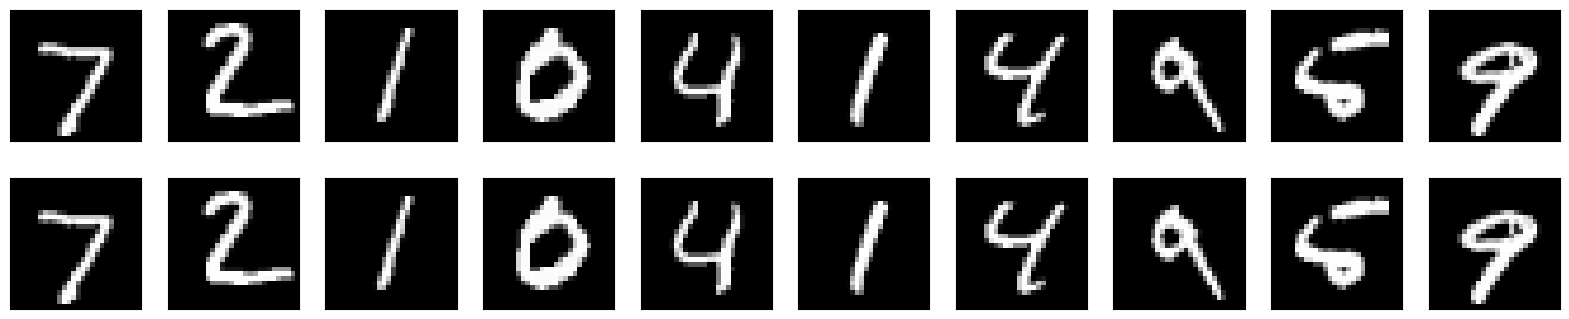

In [43]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruccion
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()